<a href="https://colab.research.google.com/github/Maxence-Pelerin/traitement-d-image/blob/main/Traitement_d'image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Populating the interactive namespace from numpy and matplotlib
Taille image --> (64945,)


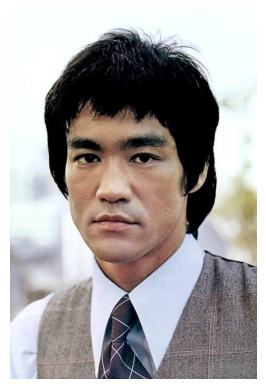

Taille image --> (75035,)


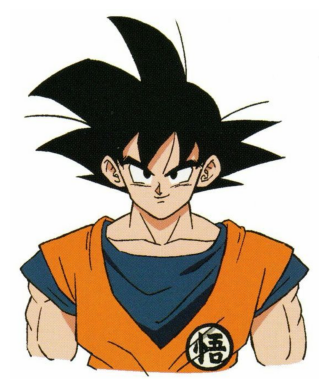

Taille image --> (235973,)


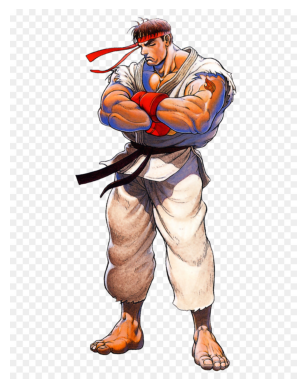

In [1]:
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

%pylab inline

Bruce_Lee = r'https://github.com/Maxence-Pelerin/traitement-d-image/blob/main/Dataset/Bruce%20Lee/Bruce-Lee.jpg?raw=true'
resp = requests.get(Bruce_Lee, stream=True).raw
image_array_Bruce_Lee = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Taille image --> {image_array_Bruce_Lee.shape}')
image_Bruce_Lee = cv2.imdecode(image_array_Bruce_Lee, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_Bruce_Lee, cv2.COLOR_BGR2RGB))
plt.show()

Goku = r'https://github.com/Maxence-Pelerin/traitement-d-image/blob/main/Dataset/Goku/GOKU.jpg?raw=true'
resp = requests.get(Goku, stream=True).raw
image_array_Goku = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Taille image --> {image_array_Goku.shape}')
image_Goku = cv2.imdecode(image_array_Goku, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_Goku, cv2.COLOR_BGR2RGB))
plt.show()

Ryu = r'https://github.com/Maxence-Pelerin/traitement-d-image/blob/main/Dataset/Ryu/RYU.jpg?raw=true'
resp = requests.get(Ryu, stream=True).raw
image_array_Ryu = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Taille image --> {image_array_Ryu.shape}')
image_Ryu = cv2.imdecode(image_array_Ryu, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_Ryu, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
!rm -rf /content/datasets # sert a supprimer les fichier dans le datasets

In [3]:
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "datasets1.zip",
   'https://github.com/Maxence-Pelerin/traitement-d-image/blob/main/Dataset/datasets1.zip?raw=true',extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets')
print(data_dir)
print(os.path.abspath(data_dir))

6203267/6203267 [==============================] - 0s 0us/step
/content/datasets
/content/datasets


In [4]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

677


In [5]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 677 files belonging to 3 classes.
Using 542 files for training.
Found 677 files belonging to 3 classes.
Using 135 files for validation.
['Bruce Lee', 'Goku', 'Ryu']


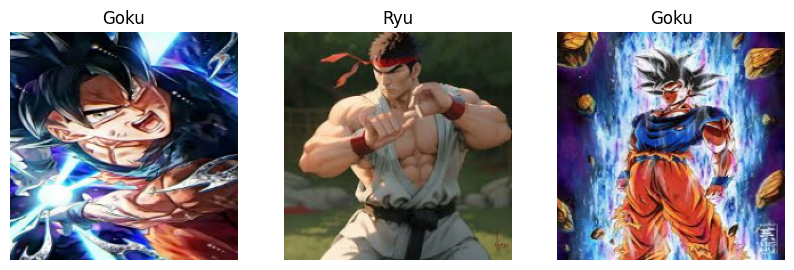

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers
#import tensorflow as tf
#import keras
num_classes = 3

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(256,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,embeddings_data=train_data)

model.fit(
  train_data,
  validation_data=val_data,
  epochs=35,
  callbacks=[tensorboard_callback]
)

Epoch 1/35


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


181/181 [==============================] - 25s 41ms/step - loss: 1.0588 - accuracy: 0.4133 - val_loss: 1.0888 - val_accuracy: 0.3630
Epoch 2/35
181/181 [==============================] - 7s 38ms/step - loss: 1.0613 - accuracy: 0.4686 - val_loss: 1.1305 - val_accuracy: 0.3704
Epoch 3/35
181/181 [==============================] - 7s 37ms/step - loss: 1.0974 - accuracy: 0.3542 - val_loss: 1.0932 - val_accuracy: 0.3630
Epoch 4/35
 39/181 [=====>........................] - ETA: 4s - loss: 1.1182 - accuracy: 0.3675

In [ ]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    res = np.argmax(model.predict(img_to_predict), axis=-1)
    print(res)
    #print(model.predict_classes(img_to_predict))
    print(model.predict(img_to_predict))
    if res == 0:
        plt.imshow(cv2.cvtColor(image_Bruce_Lee, cv2.COLOR_BGR2RGB))
        plt.show()
        print("C'est Bruce Lee")
    elif res == 1 :
        plt.imshow(cv2.cvtColor(image_Goku, cv2.COLOR_BGR2RGB))
        plt.show()
        print("C'est Goku")
    elif res == 2 :
        plt.imshow(cv2.cvtColor(image_Ryu, cv2.COLOR_BGR2RGB))
        plt.show()
        print("C'est Ryu")